### Notebook basics
- Jupyter notebook script consists of code (and markdown) cells, like this one for notes.
- You can run code cells either all together OR ONE at a time
- escape leaves a cell, then a creates a new one above and b creates a new one below
- to execute a shell press shift+enter
- to execute a shell and create a new one below press alt+enter
- to print a variable, you can either type print(variablename) or just type variablename
- In a variable assignment in Python, no need to declare type
- Use numpy (short for Numerical Python)  to create arrays (from lists, from class functions, from other objects) and operate upon  arrays


### Φορτώνουμε βιβλιοθήκες

In [2]:
import numpy as np # Numpy is a library for numerical calculations
import matplotlib.pyplot as plt # Matplotlib is the standard library for making plots
plt.rcParams['figure.figsize'] = [14, 8] # This is a global Matplotlib parameters for the default figure size
# in case you opened this file from the wrong directory
#import os  
#cwd=os.getcwd(); print(cwd)
#path='/Users/labuser...'
#os.chdir(path)


### Εισαγουμε μετρήσεις pixel vs. wavelength (από ds9)

In [6]:
# Example of pixel vs. wavelength measurements. The numbers here are random! 
#.please insert your own measurements instead

x=np.array([80,128,356,612,1366,1636]) # pixels as read from ds9
y=np.array([2190,4026,4713,5048,6678,7281])# Angstrom from literature
#dy=np.array([2,2,2,2,2,2])* 2.61 #Angstrom

dy=2* y / y * 2.61

### Definition of an instrument's resolution: R = λ/Δλ -> Δλ = λ / R ~ 6000. / 2300.
### Δηλαδή ξέρουμε περίπου το σφάλμα σε μήκος κύματος, 
### απλά δεν ξέρουμε το κεντρικό μήκος κύματος και το ευρος γιατί συνήθως ειναι tunable!

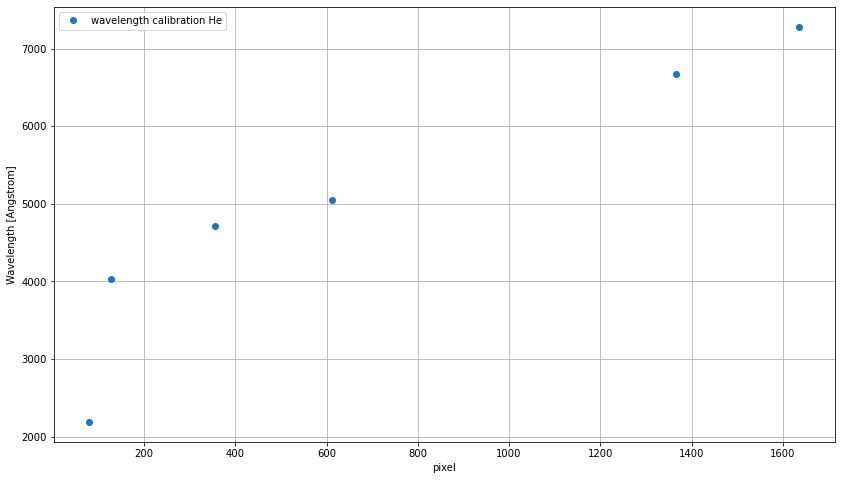

In [7]:
# plot the x,y data
plt.plot(x,y,'o',label="wavelength calibration He") 
plt.xlabel('pixel')
plt.ylabel('Wavelength [Angstrom]')
plt.legend()
plt.grid()

### Προσαρμογή ευθείας με χ^2 - είτε με υπολογιστικό κώδικα

In [8]:
def ff(x,p0,p1): return(p0+p1*x)

from scipy.optimize import curve_fit 

popt, pcov = curve_fit(ff, x, y, sigma=dy)

p0=popt[0]
p1=popt[1]

p0,p1

(3166.810644376907, 2.617313580047427)

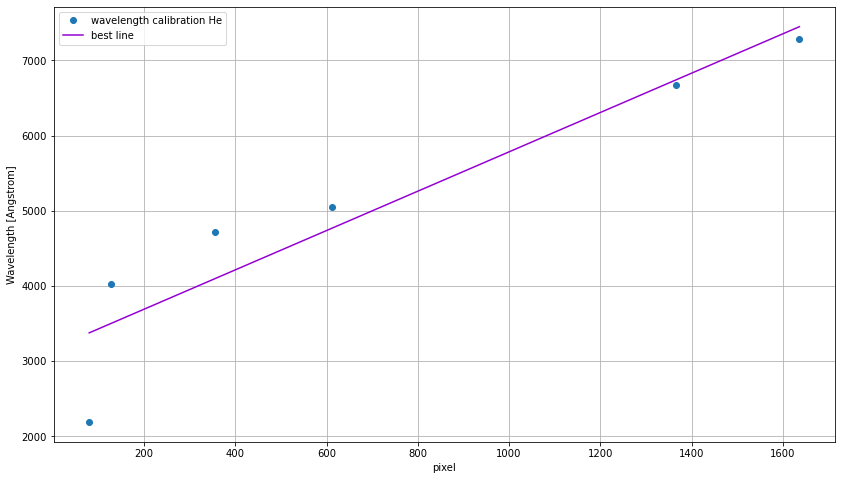

In [9]:
# plot the x,y data
plt.plot(x,y,'o',label="wavelength calibration He") 
plt.xlabel('pixel')
plt.ylabel('Wavelength [Angstrom]')

# plot the best fit model
plt.plot(x,p0+p1*x,label='best line',color='darkviolet')
plt.legend()
plt.grid()

### Εναλλακτική, αναλυτική μέθοδος χ^2

In [11]:
#αναλυτικό από ροπές
# Γραμμικό πρόβλημα, λυμμένο ήδη αναλυτικά με μέθοδο χ^2

# now with errors
m0=np.sum(y/(dy**2));  m1=np.sum(x*y/(dy**2))
s0=np.sum(x**0./dy**2); s1=np.sum(x**1./dy**2); s2=np.sum(x**2./dy**2)

p1=(m0/s0 - m1/s1)/(s1/s0-s2/s1)
p0=(m1-p1*s2)/s1

print(p0,p1)


3166.8106437467945 2.6173135800668335


### Now plot the stellar spectrum, as extracted

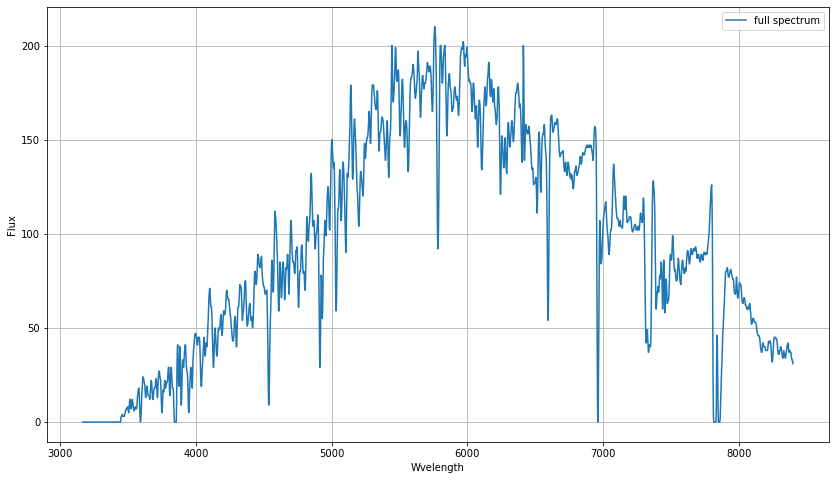

In [15]:
data = np.loadtxt('solar-spectrum-extracted.txt' ) # or however else you named your file
# load txt returns an array of all the colums. first collumn for example is data[:,0], second data[:,1] etc
data[~np.isfinite(data)] = 0. # check is there is not-a-number anywhere, and turn it in 0 (if there is). Tilda means the opposite
wavelength=p0+p1*data[:,0]  # get first column
flux=data[:,1] *1 # get second column (try *200 instead of 1)

plt.plot(wavelength,flux,label="full spectrum")
plt.xlabel('Wvelength')
plt.ylabel('Flux')
plt.legend()
plt.grid()

### Convert pixels into Angstroms

### Now compare to a galaxy's spectrum

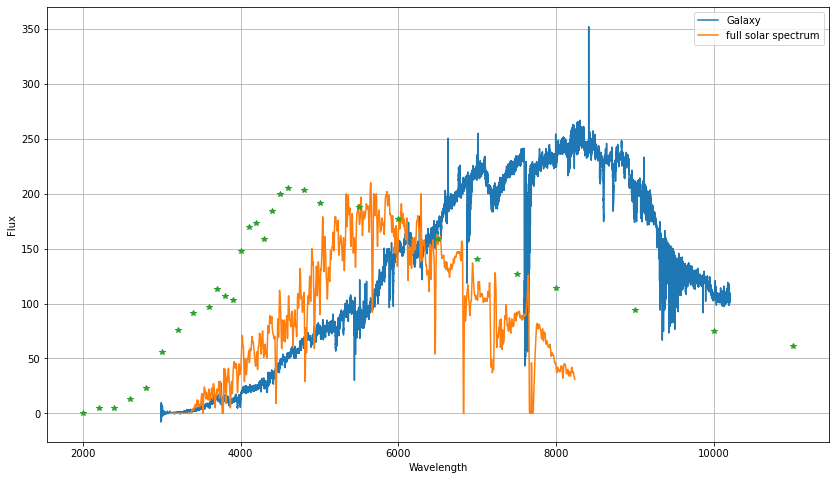

In [21]:
galaxy = np.loadtxt('galaxy_spectrum.txt') # DO NOT CHANGE THIS FILE (galaxy = np.loadtxt('galaxy_spectrum.txt'))
SED_data = np.loadtxt('solar-SED.txt') # DO NOT CHANGE THIS FILE (galaxy = np.loadtxt('galaxy_spectrum.txt'))


#np.savetxt('solar-spectrum-extracted-calibrated.txt',p0+p1*x,y,fmt='%.4e')
plt.plot(galaxy[:,0]*10.,galaxy[:,1]/30,label="Galaxy")
plt.plot(wavelength/1.02,flux,label="full solar spectrum")
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.legend()
plt.grid()
plt.plot(SED_data[:,0],SED_data[:,1],'*',label='SED data')


# Blackbody Emission
## Planck's law of black-body radiation 

$$
B_{\lambda}(\lambda, T)=\frac{2 h c^{2}}{\lambda^{5}} \frac{1}{e^{\frac{h c}{\lambda k_{\mathrm{B}} T}}-1}
$$
where $\nu$ in the frequency, $h$ is the Planck constant, $c$ is the speed of light in a vacuum, $k$ is the Boltzmann constant and $T$ is the absolute temperature of the body.

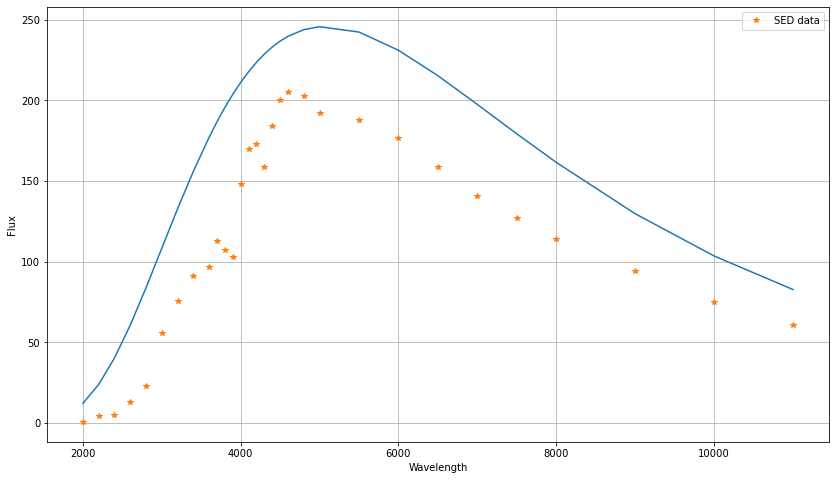

In [17]:

def black_body_luminosity(wavelength,T): #wavelength in Angstrom
    h,c, kb, = 6.626e-27 ,2.9979e10, 1.38e-16    #	erg/Hz, cm/s, erg/K
    nu = c/(wavelength*1e-8)
    B_lambda = 2*h*c**2/ wavelength**5/(np.exp(h*nu/(kb*T))-1) 
    return B_lambda # in erg/s/Angstrom/cm^2/sr from the emitting object's surface

planck= black_body_luminosity(SED_data[:,0],5700.) 

plt.plot(SED_data[:,0],1e28*planck )
plt.plot(SED_data[:,0],SED_data[:,1],'*',label='SED data')

plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.legend()
plt.grid()
